In [15]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV, learning_curve
from sklearn import metrics
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
from sklearn.svm import SVC

In [12]:
def plot_learning_curve(estimator, title, X, y, axes=None, ylim=None, 
                        cv=None,
                        n_jobs=None, 
                        train_sizes=np.linspace(.1, 1.0, 5)):
    """
    Generate 3 plots: the test and training learning curve, the training
    samples vs fit times curve, the fit times vs score curve.

    Parameters
    ----------
    estimator : object type that implements the "fit" and "predict" methods
        An object of that type which is cloned for each validation.

    title : string
        Title for the chart.

    X : array-like, shape (n_samples, n_features)
        Training vector, where n_samples is the number of samples and
        n_features is the number of features.

    y : array-like, shape (n_samples) or (n_samples, n_features), optional
        Target relative to X for classification or regression;
        None for unsupervised learning.

    axes : array of 3 axes, optional (default=None)
        Axes to use for plotting the curves.

    ylim : tuple, shape (ymin, ymax), optional
        Defines minimum and maximum yvalues plotted.

    cv : int, cross-validation generator or an iterable, optional
        Determines the cross-validation splitting strategy.
        Possible inputs for cv are:

          - None, to use the default 5-fold cross-validation,
          - integer, to specify the number of folds.
          - :term:`CV splitter`,
          - An iterable yielding (train, test) splits as arrays of indices.

        For integer/None inputs, if ``y`` is binary or multiclass,
        :class:`StratifiedKFold` used. If the estimator is not a classifier
        or if ``y`` is neither binary nor multiclass, :class:`KFold` is used.

        Refer :ref:`User Guide <cross_validation>` for the various
        cross-validators that can be used here.

    n_jobs : int or None, optional (default=None)
        Number of jobs to run in parallel.
        ``None`` means 1 unless in a :obj:`joblib.parallel_backend` context.
        ``-1`` means using all processors. See :term:`Glossary <n_jobs>`
        for more details.

    train_sizes : array-like, shape (n_ticks,), dtype float or int
        Relative or absolute numbers of training examples that will be used to
        generate the learning curve. If the dtype is float, it is regarded as a
        fraction of the maximum size of the training set (that is determined
        by the selected validation method), i.e. it has to be within (0, 1].
        Otherwise it is interpreted as absolute sizes of the training sets.
        Note that for classification the number of samples usually have to
        be big enough to contain at least one sample from each class.
        (default: np.linspace(0.1, 1.0, 5))
    """
    if axes is None:
        _, axes = plt.subplots(1, 1, figsize=(20, 5))

    axes.set_title(title)
    if ylim is not None:
        axes.set_ylim(*ylim)
    axes.set_xlabel("Training examples")
    axes.set_ylabel("Accuracy")

    train_sizes, train_scores, test_scores, fit_times, _ = \
        learning_curve(estimator, X, y, cv=cv, n_jobs=n_jobs,
                       train_sizes=train_sizes, scoring='accuracy',
                       return_times=True)
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)
    fit_times_mean = np.mean(fit_times, axis=1)
    fit_times_std = np.std(fit_times, axis=1)

    # Plot learning curve
    axes.grid()
    axes.fill_between(train_sizes, train_scores_mean - train_scores_std,
                         train_scores_mean + train_scores_std, alpha=0.1,
                         color="r")
    axes.fill_between(train_sizes, test_scores_mean - test_scores_std,
                         test_scores_mean + test_scores_std, alpha=0.1,
                         color="g")
    axes.plot(train_sizes, train_scores_mean, 'o-', color="r",
                 label="Training score")
    axes.plot(train_sizes, test_scores_mean, 'o-', color="g",
                 label="Cross-validation score")
    axes.legend(loc="best")

    '''# Plot n_samples vs fit_times
    axes[1].grid()
    axes[1].plot(train_sizes, fit_times_mean, 'o-')
    axes[1].fill_between(train_sizes, fit_times_mean - fit_times_std,
                         fit_times_mean + fit_times_std, alpha=0.1)
    axes[1].set_xlabel("Training examples")
    axes[1].set_ylabel("fit_times")
    axes[1].set_title("Scalability of the model")

    # Plot fit_time vs score
    axes[2].grid()
    axes[2].plot(fit_times_mean, test_scores_mean, 'o-')
    axes[2].fill_between(fit_times_mean, test_scores_mean - test_scores_std,
                         test_scores_mean + test_scores_std, alpha=0.1)
    axes[2].set_xlabel("fit_times")
    axes[2].set_ylabel("Score")
    axes[2].set_title("Performance of the model")'''

    return plt

SVMs assume that the data it works with is in a standard range, usually either 0 to 1, or -1 to 1 (roughly). So the normalization of feature vectors prior to feeding them to the SVM is very important. ... Some libraries recommend doing a 'hard' normalization, mapping the min and max values of a given dimension to 0 and 1.

We can do the same normalization technique we used for KNN, with bounds of [0, 1]

https://towardsdatascience.com/a-guide-to-svm-parameter-tuning-8bfe6b8a452c

In [50]:
data = pd.read_csv('heart_failure_clinical_records_dataset.csv')

#
# Need to split data into train/test, and transform (normalize) values to be between [0, 1]
#
X = data.copy()
X.drop(columns='DEATH_EVENT', inplace=True)

y = data['DEATH_EVENT']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

min_max_scaler = preprocessing.MinMaxScaler()
X_train_minmax = min_max_scaler.fit_transform(X_train)
X_test_minmax = min_max_scaler.fit_transform(X_test)

Explore different Kernals (linear, poly)

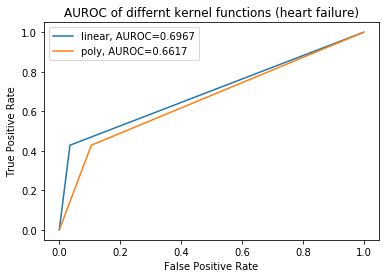

In [51]:
for k in ['linear', 'poly']:
    model = SVC(kernel=k)
    model.fit(X_train_minmax, y_train)
    y_pred = model.predict(X_test_minmax)
    fpr, tpr, _ = metrics.roc_curve(y_test, y_pred)
    roc_auc = metrics.auc(fpr, tpr)
    plt.plot(fpr, tpr, label=f'{k}, AUROC={np.round(roc_auc, 4)}')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend()
plt.title('AUROC of differnt kernel functions (heart failure)')
plt.show()

In [70]:
def svm_tuning(X, y, X_test, y_test, classifier, param_grid, title):
    #create new a knn model
    clf = classifier
    clf_gscv = GridSearchCV(clf, param_grid, cv=5) #fit model to data
    clf_gscv.fit(X, y)

    #check top performing n_neighbors value
    print(clf_gscv.best_params_)

    #check mean score for the top performing value of n_neighbors
    print(clf_gscv.best_score_)
    
    try:
        plot_roc_curve(clf_gscv, X_test, y_test)  # doctest: +SKIP
        plt.title(title)
        plt.show() 
    except:
        pass
    return clf_gscv

{'C': 1.0, 'degree': 2, 'kernel': 'linear'}
0.825


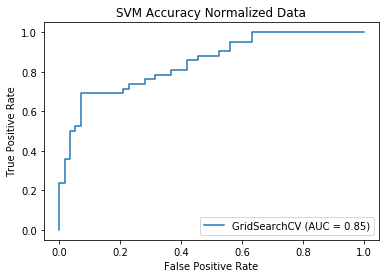

In [53]:
#create a dictionary of all values we want to test for n_neighbors
param_grid = {
    'C': np.linspace(1, 10, 2),
    'kernel': ['linear', 'poly'],
    'degree': [2, 3, 4]
    # May need more 
}
    
results = svm_tuning(X_train_minmax, y_train, X_test_minmax, y_test, SVC(),
               param_grid, 'SVM Accuracy Normalized Data')

<module 'matplotlib.pyplot' from '/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/matplotlib/pyplot.py'>

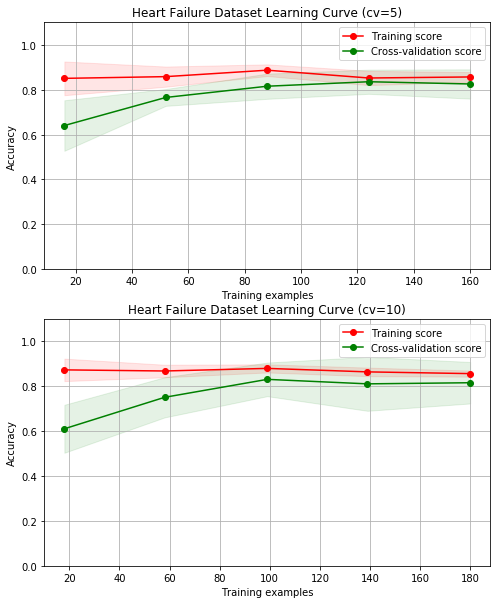

In [16]:
fig, axes = plt.subplots(2, 1, figsize=(8, 10))
model = SVC(kernel='linear')
plot_learning_curve(model, 
                    'Heart Failure Dataset Learning Curve (cv=5)', 
                    X_train_minmax, y_train, axes=axes[0], ylim=(0.0, 1.1),
                    cv=5, n_jobs=4)

plot_learning_curve(model, 
                    'Heart Failure Dataset Learning Curve (cv=10)', 
                    X_train_minmax, y_train, axes=axes[1], ylim=(0.0, 1.1),
                    cv=10, n_jobs=4)

In [54]:
df = pd.read_csv('ObesityDataSet_raw_and_data_sinthetic.csv')
print(data.columns)

# Handle Categorical features
clfs = {c:preprocessing.LabelEncoder() for c in ['Gender', 'family_history_with_overweight',
                                   'FAVC', 'CAEC', 'SMOKE', 
                                   'SCC','CALC', 'MTRANS', 'NObeyesdad']}

for col, clf in clfs.items():
    df[col] = clfs[col].fit_transform(df[col])
    
#
# Need to split data into train/test, and transform (normalize) values to be between [0, 1]
#

X = df.drop(columns='NObeyesdad')
y = df['NObeyesdad'].values
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)


min_max_scaler = preprocessing.MinMaxScaler()
X_train_minmax = min_max_scaler.fit_transform(X_train)
X_test_minmax = min_max_scaler.fit_transform(X_test)

Index(['age', 'anaemia', 'creatinine_phosphokinase', 'diabetes',
       'ejection_fraction', 'high_blood_pressure', 'platelets',
       'serum_creatinine', 'serum_sodium', 'sex', 'smoking', 'time',
       'DEATH_EVENT'],
      dtype='object')


linear
0.8873907384916297
poly
0.953803794148298


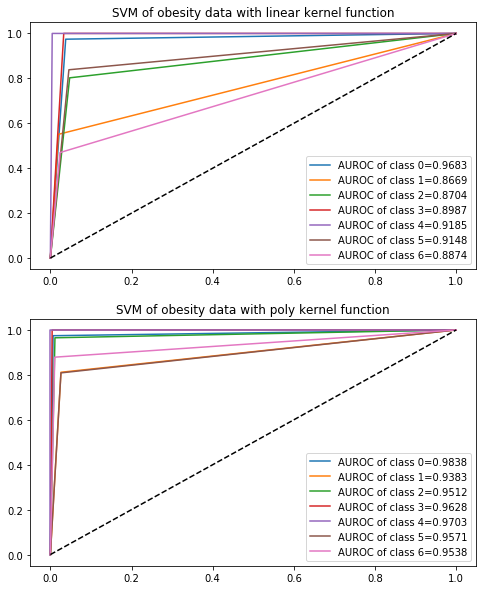

In [62]:
fig, axes = plt.subplots(2, 1, figsize=(8, 10))
for j, k in enumerate(['linear', 'poly']):
    model = SVC(kernel=k)
    model.fit(X_train_minmax, y_train)

    y_train_bin = preprocessing.label_binarize(y_train, classes=[0, 1, 2, 3, 4, 5, 6])
    y_test_bin = preprocessing.label_binarize(y_test, classes=[0, 1, 2, 3, 4, 5, 6])
    y_pred = model.predict(X_test_minmax)
    y_pred = preprocessing.label_binarize(y_pred, classes=[0, 1, 2, 3, 4, 5, 6])

    n_classes = 7
    fpr = dict()
    tpr = dict()
    roc_auc = dict()
    for i in range(n_classes):
        fpr[i], tpr[i], _ = metrics.roc_curve(y_test_bin[:, i], y_pred[:, i])
        roc_auc[i] = metrics.auc(fpr[i], tpr[i])
        axes[j].plot(fpr[i], tpr[i], 
                 label=f'AUROC of class {i}={np.round(np.mean(list(roc_auc.values())), 4)}')
    axes[j].legend()
    axes[j].set_title(f'SVM of obesity data with {k} kernel function')
    axes[j].plot([0, 1], [0, 1], 'k--')

    print(k)
    print(np.mean(list(roc_auc.values())))

plt.show()

In [73]:
#create a dictionary of all values we want to test for n_neighbors
param_grid = {
    'C': np.linspace(1, 10, 1),
    'kernel': ['linear', 'poly'],
    'degree': [2, 3, 4, 5],
    'gamma': ['scale', 'auto']
    # May need more 
}
    
model = svm_tuning(X_train_minmax, y_train, X_test_minmax, y_test, SVC(),
               param_grid, 'SVM Accuracy Normalized Data')

{'C': 1.0, 'degree': 4, 'gamma': 'scale', 'kernel': 'poly'}
0.9128379187796989


{'kernel': 'poly'}
0.9033682066845026
[3 2 5 4 4 3 0 4 2 3 4 2 5 2 1 2 1 4 5 6 4 3 2 2 2 3 4 6 6 3 5 6 6 2 3 5 6
 0 5 1 5 6 0 5 4 3 2 0 4 0 5 3 3 5 2 3 5 5 3 1 2 1 2 0 0 3 1 5 5 2 6 4 3 2
 2 5 2 5 3 0 6 5 2 1 6 1 1 3 4 3 5 0 0 3 6 4 2 3 3 3 0 2 0 5 4 2 6 4 1 6 0
 1 2 5 2 6 2 2 6 0 2 4 0 1 4 2 2 5 6 5 1 1 1 2 6 4 5 3 4 3 6 6 1 0 0 1 6 6
 2 0 6 5 4 4 4 2 2 1 3 5 2 4 6 4 0 0 3 2 5 4 5 3 4 5 5 3 2 0 1 3 5 5 4 4 4
 0 5 5 3 4 2 6 3 6 1 4 3 3 2 1 5 0 5 5 2 6 2 2 2 0 5 1 1 3 3 6 5 4 6 4 3 2
 0 0 4 4 1 6 5 0 4 4 5 4 0 3 1 1 2 4 2 0 4 4 6 1 0 4 6 6 2 5 6 4 5 4 0 4 2
 1 4 1 1 1 0 2 3 0 1 4 6 2 4 1 2 2 1 1 1 6 2 1 0 1 1 5 2 4 6 4 4 3 1 4 4 5
 0 1 4 4 0 1 1 0 6 4 5 0 0 0 5 0 2 0 3 3 4 0 5 0 3 2 4 2 4 6 2 0 0 1 5 5 0
 0 1 0 0 0 3 5 2 5 1 0 0 6 1 2 6 1 0 3 4 5 3 6 2 6 3 5 3 0 2 4 6 0 2 4 0 4
 3 4 1 0 6 2 1 2 4 0 0 4 5 2 3 2 0 0 0 3 6 1 3 3 6 1 2 1 5 2 0 6 4 2 5 1 4
 0 2 6 6 4 5 3 0 5 6 6 1 3 4 3 3 2 3 2 2 0 1 1 4 4 6 4 4 3 2 3 2 1 1 3 5 4
 4 2 1 6 6 2 5 5 2 3 2 4 1 0 2 3 4 0 6 0 4 1 2 4 2 0 5 6 6 3 3

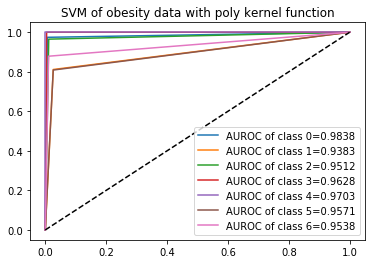

In [77]:
param_grid = {
    'kernel': ['linear', 'poly']
}
model = svm_tuning(X_train_minmax, y_train, X_test_minmax, y_test, SVC(),
               param_grid, 'SVM Accuracy Normalized Data')

y_train_bin = preprocessing.label_binarize(y_train, classes=[0, 1, 2, 3, 4, 5, 6])
y_test_bin = preprocessing.label_binarize(y_test, classes=[0, 1, 2, 3, 4, 5, 6])
y_pred = model.predict(X_test_minmax)
y_pred = preprocessing.label_binarize(y_pred, classes=[0, 1, 2, 3, 4, 5, 6])

n_classes = 7
fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(n_classes):
    fpr[i], tpr[i], _ = metrics.roc_curve(y_test_bin[:, i], y_pred[:, i])
    roc_auc[i] = metrics.auc(fpr[i], tpr[i])
    plt.plot(fpr[i], tpr[i], 
             label=f'AUROC of class {i}={np.round(np.mean(list(roc_auc.values())), 4)}')
plt.legend()
plt.title(f'SVM of obesity data with poly kernel function')
plt.plot([0, 1], [0, 1], 'k--')

print(np.mean(list(roc_auc.values())))

In [75]:
model

GridSearchCV(cv=5, estimator=SVC(), param_grid={'kernel': ['linear', 'poly']})

<module 'matplotlib.pyplot' from '/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/matplotlib/pyplot.py'>

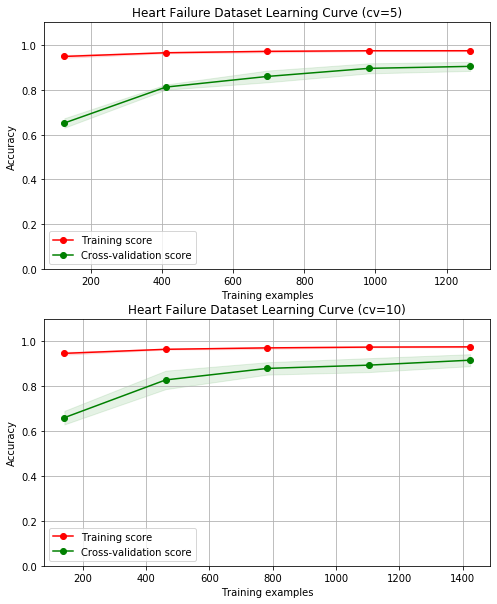

In [72]:
fig, axes = plt.subplots(2, 1, figsize=(8, 10))
model = SVC(kernel='poly')
plot_learning_curve(model, 
                    'Heart Failure Dataset Learning Curve (cv=5)', 
                    X_train_minmax, y_train, axes=axes[0], ylim=(0.0, 1.1),
                    cv=5, n_jobs=4)

plot_learning_curve(model, 
                    'Heart Failure Dataset Learning Curve (cv=10)', 
                    X_train_minmax, y_train, axes=axes[1], ylim=(0.0, 1.1),
                    cv=10, n_jobs=4)